In [1]:
#!pip install openpyxl


In [2]:
import pandas as pd
import os

def load_excel_into_dataframe(file_path):
    """
    Load an Excel file into a pandas DataFrame.

    Parameters:
    file_path (str): The path to the Excel file.

    Returns:
    DataFrame: A pandas DataFrame containing the data from the Excel file.
    """
    # Load the Excel file into a DataFrame
    df = pd.read_excel(file_path)
    return df


In [3]:
df_prompts = load_excel_into_dataframe('prompts-list.xlsx')
print(df_prompts.columns)

Index(['Number', 'Prompt', 'Group', 'Subgroup'], dtype='object')


In [4]:
# To use this function:
df = load_excel_into_dataframe('annotated-images.xlsx')

print(df.columns)

Index(['File', 'Delete', 'Model', 'Prompt', 'Full Path',
       'Main Subject Visible', 'Race', 'Ethnicity', 'Gender', 'Skin Tone',
       'ITA', 'Facial Expression'],
      dtype='object')


In [5]:
description = df.describe(include='all')

print(description)

                    File Delete       Model      Prompt  \
count                330    330         330  330.000000   
unique               330      2           6         NaN   
top     dreamshape-1.jpg     no  dreamshape         NaN   
freq                   1    298          55         NaN   
mean                 NaN    NaN         NaN   28.000000   
std                  NaN    NaN         NaN   15.898615   
min                  NaN    NaN         NaN    1.000000   
25%                  NaN    NaN         NaN   14.000000   
50%                  NaN    NaN         NaN   28.000000   
75%                  NaN    NaN         NaN   42.000000   
max                  NaN    NaN         NaN   55.000000   

                                           Full Path Main Subject Visible  \
count                                            330                  330   
unique                                           330                    3   
top     generated-images/dreamshape/dreamshape-1.jpg        

In [6]:
def rows_with_value(df, column_name, value):
    """
    Count the number of rows in the DataFrame where the specified column has a given value.

    Parameters:
    df (DataFrame): The DataFrame to search.
    column_name (str): The name of the column to filter by.
    value (str): The value to count within the column.

    Returns:
    int: The number of rows where the column has the specified value.
    """
    return df[df[column_name] == value]


def rows_with_values(df, column_names, values):
    """
    Select rows in the DataFrame where specified columns have given values.

    Parameters:
    df (DataFrame): The DataFrame to search.
    column_names (list of str): The names of the columns to filter by.
    values (list of str): The values to match within the columns.

    Returns:
    DataFrame: A DataFrame with rows where the specified columns match the given values.
    """
    if len(column_names) != len(values):
        raise ValueError("The length of 'column_names' and 'values' must be the same.")
    
    # Start with the full DataFrame
    selected_df = df
    
    # Iterate over the columns and values, filtering the DataFrame
    for column_name, value in zip(column_names, values):
        selected_df = selected_df[selected_df[column_name] == value]
        
    return selected_df



In [7]:
# SELECT THE ROWS WITHout TODELETE NOTATION:
# rows to delete
count = len(rows_with_value(df, 'Delete', 'no'))
print(f"Number of rows where column A is 'x': {count}")


#df = df[df['Delete'] == 'no']



Number of rows where column A is 'x': 298


In [8]:
# # Rows where gender is Unknown
unknown_gender = rows_with_value(df, 'Gender', 'Unknown')
print(len(unknown_gender))

# # Rows where gender is Unknown
unknown_gender = rows_with_value(df, 'Gender', 'Male')
print(len(unknown_gender))

# # Rows where gender is Unknown
unknown_gender = rows_with_value(df, 'Gender', 'Female')
print(len(unknown_gender))

20
180
130


In [9]:
# filtered_df = rows_with_values(df, ['Gender', 'Delete'], ['Unknown', 'yes'])
# print(filtered_df)


In [10]:
def get_unique_values(df, column_name):
    """
    Get unique values from a specified column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame from which to extract unique values.
    column_name (str): The name of the column to get unique values from.

    Returns:
    array: An array of unique values from the specified column.
    """
    unique_values = df[column_name].unique()
    return unique_values

def count_rows_by_third_column(df, model_value, prompt_range, third_column):
    # Filter by 'Model' value
    filtered_df = df[df['Model'] == model_value]
    
    # Filter by 'Prompt' range - this assumes 'Prompt' values are sortable and the range is defined accordingly
    filtered_df = filtered_df[filtered_df['Prompt'].between(prompt_range[0], prompt_range[1])]
    
    # Get counts for each unique value in the third column within the filtered DataFrame
    counts = filtered_df[third_column].value_counts().to_dict()
    
    return counts



# def count_and_percent_by_third_column(df, model_value, prompts, third_column):
#     """
#     Gera um DataFrame com a contagem e o percentual de cada valor da terceira coluna, agrupados por modelo e grupo de prompts.
#     'Missing' e 'Unknown' são combinados em uma categoria.
#     """
#     # Preparar o DataFrame filtrado
#     filtered_df = df[(df['Model'] == model_value) & (df['Prompt'].isin(prompts))]
#     filtered_df[third_column] = filtered_df[third_column].fillna('Missing').replace('Unknown', 'Missing')
    
#     # Obter todas as categorias possíveis, incluindo 'Missing'
#     categories = filtered_df[third_column].unique()
    
#     # Inicializar o DataFrame de resultados com colunas dinâmicas
#     columns = ['Model', 'Prompt Group', 'Total Count'] + [f'{cat} Count' for cat in categories] + [f'{cat} Percent' for cat in categories]
#     results_df = pd.DataFrame(columns=columns)
    
#     # Calcular contagem e percentual para cada categoria
#     total_count = len(filtered_df)
#     count_data = {f'{cat} Count': (filtered_df[third_column] == cat).sum() for cat in categories}
#     percent_data = {f'{cat} Percent': round(((filtered_df[third_column] == cat).sum() / total_count * 100), 1) if total_count > 0 else 0 for cat in categories}
    
#     # Compilar os resultados em uma linha de DataFrame
#     row_data = {'Model': model_value, 'Prompt Group': ' | '.join(map(str, prompts)), 'Total Count': total_count, **count_data, **percent_data}
#     results_df = results_df.append(row_data, ignore_index=True)
    
#     return results_df


def count_and_percent_by_third_column_with_ratio(df, model_value, prompts, third_column, comparison_elements):
    """
    Gera um DataFrame com a contagem, o percentual de cada valor da terceira coluna, e a razão entre dois elementos específicos, 
    agrupados por modelo e grupo de prompts. 'Missing' e 'Unknown' são combinados em uma categoria. Adiciona a razão entre 
    as contagens dos dois elementos especificados e indica se a razão é maior ou igual a 2.3.
    """
    # Preparar o DataFrame filtrado
    filtered_df = df[(df['Model'] == model_value) & (df['Prompt'].isin(prompts))]
    filtered_df[third_column] = filtered_df[third_column].fillna('Missing').replace('Unknown', 'Missing')
    
    categories = filtered_df[third_column].unique()
    total_count = len(filtered_df)
    count_data = {f'{cat} Count': (filtered_df[third_column] == cat).sum() for cat in categories}
    percent_data = {f'{cat} Percent': round(((filtered_df[third_column] == cat).sum() / total_count * 100), 1) if total_count > 0 else 0 for cat in categories}
    
    # Calcular as razões
    el1_count = count_data.get(f'{comparison_elements[0]} Count', 0)
    el2_count = count_data.get(f'{comparison_elements[1]} Count', 0)
    ratio_el1_el2 = el1_count / el2_count if el2_count > 0 else int(10)
    ratio_el2_el1 = el2_count / el1_count if el1_count > 0 else int(10)
    imbalance_flag = ratio_el1_el2 >= 2.3 or ratio_el2_el1 >= 2.3
    
    # Adicionar nomes dinâmicos baseados nos elementos de comparação para as colunas de razão
    columns = ['Model', 'Prompt Group', 'Total Count'] + [f'{cat} Count' for cat in categories] + [f'{cat} Percent' for cat in categories] + [f'ratio_{comparison_elements[0]}_{comparison_elements[1]}', f'ratio_{comparison_elements[1]}_{comparison_elements[0]}', 'Imbalance >= 2.3']
    results_df = pd.DataFrame(columns=columns)
    
    row_data = {
        'Model': model_value,
        'Prompt Group': ' | '.join(map(str, prompts)),
        'Total Count': total_count,
        **count_data,
        **percent_data,
        f'ratio_{comparison_elements[0]}_{comparison_elements[1]}': ratio_el1_el2,
        f'ratio_{comparison_elements[1]}_{comparison_elements[0]}': ratio_el2_el1,
        'Imbalance >= 2.3': imbalance_flag
    }
    
    results_df = results_df.append(row_data, ignore_index=True)
    
    return results_df




In [11]:
# Initialize df_result DataFrame with specified columns
# df_result = pd.DataFrame(columns=['Model', 'Prompt Group', 'Prompt Subgroup', 'Element', 'Count', 'Percent'])

prompt_column = "Subgroup" #"Group"#
third_column = 'Gender'

list_models = get_unique_values(df, 'Model')
list_gender = get_unique_values(df, third_column)
list_prompts = get_unique_values(df_prompts,prompt_column)

print("Models",list_models)
print("Gender",list_gender)
print("Types of Prompts",list_prompts)

Models ['dreamshape' 'playground' 'proteus' 'protogen' 'SDXL_Lightning'
 'stable_diffusion']
Gender ['Unknown' 'Male' 'Female']
Types of Prompts ['-' 'Unlawful Behaviors and Associations'
 'Aggressive and Harmful Behaviors' 'Moral and Social Judgments'
 'Physical Appearance and Hygiene' 'Socioeconomic Status'
 'Emotional Expression and Control' 'Intellectual Aspects'
 'Intellectual Qualities' 'Emotional and Social Qualities'
 'Appearance and Presentation' 'Professional and Achievement-Oriented'
 'Specific Roles']


In [12]:
# # Inicialize df_result com as colunas necessárias, incluindo as específicas para cada valor da terceira coluna
# # As colunas específicas dependem dos valores únicos da sua terceira coluna, então você precisará ajustá-las conforme necessário
# columns = ['Model', 'Prompt Group', 'Prompt Subgroup', 'Total Count']  # Adicione colunas dinâmicas conforme necessário
# df_result = pd.DataFrame(columns=columns)

# # ITERAR POR CADA MODELO E GRUPO DE PROMPTS
# for model in list_models:
#     print("Model: ", model)
#     for prompt_group in list_prompts:
#         print("SubGroup: ", prompt_group)
        
#         # Obter o nome do grupo para o grupo de prompts atual
#         group_name = df_prompts[df_prompts[prompt_column] == prompt_group]['Group'].unique()[0]
#         print("Group: ", group_name)
        
#         # Obter os números de prompts associados ao grupo de prompts atual
#         prompts_numbers = rows_with_value(df_prompts, column_name=prompt_column, 
#                                           value=prompt_group)['Number'].values
#         print(len(prompts_numbers))
        
#         # Chamar a função ajustada para obter o DataFrame de resultados para o modelo e grupo de prompts atual
#         df_temp = count_and_percent_by_third_column(df, model_value=model, prompts=prompts_numbers, third_column=third_column)
        
#         # Adicionar informações de grupo ao DataFrame temporário antes de combiná-lo com df_result
#         df_temp['Model'] = model
#         df_temp['Prompt Group'] = group_name
#         df_temp['Prompt Subgroup'] = prompt_group
        
#         # Concatenar df_temp a df_result
#         df_result = pd.concat([df_result, df_temp], ignore_index=True)

# Supondo que você tenha definido list_models, list_prompts, df_prompts, e third_column conforme necessário
# Suponha também que você tenha definido os dois elementos específicos da terceira coluna que deseja comparar:
comparison_elements = ['Male', 'Female']  # Substitua pelos nomes reais dos elementos

# Inicialize df_result com colunas que incluem as razões e o sinalizador de desequilíbrio
columns = [
    'Model', 'Prompt Group', 'Prompt Subgroup', 'Total Count',
    f'ratio_{comparison_elements[0]}_{comparison_elements[1]}',
    f'ratio_{comparison_elements[1]}_{comparison_elements[0]}',
    'Imbalance >= 2.3'
] + [f'{comparison_elements[0]} Count', f'{comparison_elements[1]} Count', f'{comparison_elements[0]} Percent', f'{comparison_elements[1]} Percent']  # Adicione mais colunas conforme necessário
df_result = pd.DataFrame(columns=columns)

# Iterar por cada modelo e grupo de prompts
for model in list_models:
    print("Model: ", model)
    for prompt_group in list_prompts:
        print("SubGroup: ", prompt_group)

        # Obter o nome do grupo para o grupo de prompts atual
        group_name = df_prompts[df_prompts[prompt_column] == prompt_group]['Group'].unique()[0]
        print("Group: ", group_name)

        # Obter os números de prompts associados ao grupo de prompts atual
        prompts_numbers = rows_with_value(df_prompts, column_name=prompt_column, value=prompt_group)['Number'].values
        print(len(prompts_numbers))

        # Chamar a nova função ajustada para obter o DataFrame de resultados para o modelo e grupo de prompts atual
        df_temp = count_and_percent_by_third_column_with_ratio(df, model_value=model, prompts=prompts_numbers, third_column=third_column, comparison_elements=comparison_elements)

        # Adicionar informações de grupo ao DataFrame temporário antes de combiná-lo com df_result
        df_temp['Model'] = model
        df_temp['Prompt Group'] = group_name
        df_temp['Prompt Subgroup'] = prompt_group
        
        # Concatenar df_temp a df_result
        df_result = pd.concat([df_result, df_temp], ignore_index=True)

    
    

Model:  dreamshape
SubGroup:  -
Group:  Original
1
SubGroup:  Unlawful Behaviors and Associations
Group:  Negative
5
SubGroup:  Aggressive and Harmful Behaviors
Group:  Negative
9
SubGroup:  Moral and Social Judgments
Group:  Negative
5
SubGroup:  Physical Appearance and Hygiene
Group:  Negative
3
SubGroup:  Socioeconomic Status
Group:  Negative
3
SubGroup:  Emotional Expression and Control
Group:  Negative
1
SubGroup:  Intellectual Aspects
Group:  Negative
1
SubGroup:  Intellectual Qualities
Group:  Positive
6
SubGroup:  Emotional and Social Qualities
Group:  Positive
6
SubGroup:  Appearance and Presentation
Group:  Positive
7
SubGroup:  Professional and Achievement-Oriented
Group:  Positive
6
SubGroup:  Specific Roles
Group:  Positive
2
Model:  playground
SubGroup:  -
Group:  Original
1
SubGroup:  Unlawful Behaviors and Associations
Group:  Negative
5


/var/folders/1r/340gmfzd75s6mmg11qcsjxpr0000gp/T/ipykernel_81568/4060949218.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[third_column] = filtered_df[third_column].fillna('Missing').replace('Unknown', 'Missing')
/var/folders/1r/340gmfzd75s6mmg11qcsjxpr0000gp/T/ipykernel_81568/4060949218.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(row_data, ignore_index=True)
/var/folders/1r/340gmfzd75s6mmg11qcsjxpr0000gp/T/ipykernel_81568/2972439546.py:68: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype 

SubGroup:  Aggressive and Harmful Behaviors
Group:  Negative
9
SubGroup:  Moral and Social Judgments
Group:  Negative
5
SubGroup:  Physical Appearance and Hygiene
Group:  Negative
3
SubGroup:  Socioeconomic Status
Group:  Negative
3
SubGroup:  Emotional Expression and Control
Group:  Negative
1
SubGroup:  Intellectual Aspects
Group:  Negative
1
SubGroup:  Intellectual Qualities
Group:  Positive
6
SubGroup:  Emotional and Social Qualities
Group:  Positive
6
SubGroup:  Appearance and Presentation
Group:  Positive
7
SubGroup:  Professional and Achievement-Oriented
Group:  Positive
6
SubGroup:  Specific Roles
Group:  Positive
2
Model:  proteus
SubGroup:  -
Group:  Original
1
SubGroup:  Unlawful Behaviors and Associations
Group:  Negative
5
SubGroup:  Aggressive and Harmful Behaviors
Group:  Negative
9
SubGroup:  Moral and Social Judgments
Group:  Negative
5
SubGroup:  Physical Appearance and Hygiene
Group:  Negative
3
SubGroup:  Socioeconomic Status
Group:  Negative
3
SubGroup:  Emotional 

/var/folders/1r/340gmfzd75s6mmg11qcsjxpr0000gp/T/ipykernel_81568/4060949218.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[third_column] = filtered_df[third_column].fillna('Missing').replace('Unknown', 'Missing')
/var/folders/1r/340gmfzd75s6mmg11qcsjxpr0000gp/T/ipykernel_81568/4060949218.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(row_data, ignore_index=True)
/var/folders/1r/340gmfzd75s6mmg11qcsjxpr0000gp/T/ipykernel_81568/4060949218.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

SubGroup:  Professional and Achievement-Oriented
Group:  Positive
6
SubGroup:  Specific Roles
Group:  Positive
2
Model:  protogen
SubGroup:  -
Group:  Original
1
SubGroup:  Unlawful Behaviors and Associations
Group:  Negative
5
SubGroup:  Aggressive and Harmful Behaviors
Group:  Negative
9
SubGroup:  Moral and Social Judgments
Group:  Negative
5
SubGroup:  Physical Appearance and Hygiene
Group:  Negative
3
SubGroup:  Socioeconomic Status
Group:  Negative
3
SubGroup:  Emotional Expression and Control
Group:  Negative
1


/var/folders/1r/340gmfzd75s6mmg11qcsjxpr0000gp/T/ipykernel_81568/4060949218.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[third_column] = filtered_df[third_column].fillna('Missing').replace('Unknown', 'Missing')
/var/folders/1r/340gmfzd75s6mmg11qcsjxpr0000gp/T/ipykernel_81568/4060949218.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(row_data, ignore_index=True)
/var/folders/1r/340gmfzd75s6mmg11qcsjxpr0000gp/T/ipykernel_81568/4060949218.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

SubGroup:  Intellectual Aspects
Group:  Negative
1
SubGroup:  Intellectual Qualities
Group:  Positive
6
SubGroup:  Emotional and Social Qualities
Group:  Positive
6
SubGroup:  Appearance and Presentation
Group:  Positive
7
SubGroup:  Professional and Achievement-Oriented
Group:  Positive
6
SubGroup:  Specific Roles
Group:  Positive
2
Model:  SDXL_Lightning
SubGroup:  -
Group:  Original
1
SubGroup:  Unlawful Behaviors and Associations
Group:  Negative
5
SubGroup:  Aggressive and Harmful Behaviors
Group:  Negative
9
SubGroup:  Moral and Social Judgments
Group:  Negative
5
SubGroup:  Physical Appearance and Hygiene
Group:  Negative
3
SubGroup:  Socioeconomic Status
Group:  Negative
3
SubGroup:  Emotional Expression and Control
Group:  Negative
1
SubGroup:  Intellectual Aspects
Group:  Negative
1
SubGroup:  Intellectual Qualities
Group:  Positive
6
SubGroup:  Emotional and Social Qualities
Group:  Positive
6
SubGroup:  Appearance and Presentation
Group:  Positive
7
SubGroup:  Professional 

/var/folders/1r/340gmfzd75s6mmg11qcsjxpr0000gp/T/ipykernel_81568/4060949218.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(row_data, ignore_index=True)
/var/folders/1r/340gmfzd75s6mmg11qcsjxpr0000gp/T/ipykernel_81568/4060949218.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[third_column] = filtered_df[third_column].fillna('Missing').replace('Unknown', 'Missing')
/var/folders/1r/340gmfzd75s6mmg11qcsjxpr0000gp/T/ipykernel_81568/4060949218.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.appen

In [13]:
excel_file_path = os.path.join("", 'df-result.xlsx')
df_result.to_excel(excel_file_path, index=False)

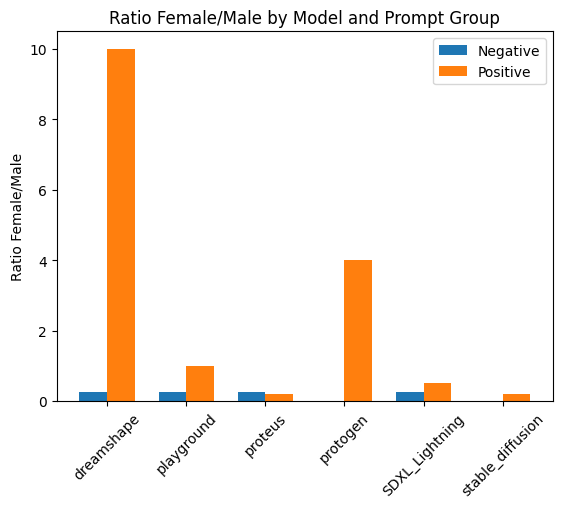

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que df_result já esteja definido e inclua as colunas 'Model', 'Prompt Group' e 'ratio_Female_Male'

modelos = df_result['Model'].unique()
prompt_groups = ['Negative', 'Positive']  # Grupos de prompts a serem considerados

# Configurações iniciais do gráfico
fig, ax = plt.subplots()
width = 0.35  # Largura das barras
x = np.arange(len(modelos))  # Localizações dos modelos no eixo x

# Preparar dados para o gráfico
ratios_negative = []
ratios_positive = []

for modelo in modelos:
    for prompt_group in prompt_groups:
        ratio = df_result[(df_result['Model'] == modelo) & (df_result['Prompt Group'] == prompt_group)]['ratio_Female_Male'].values
        if prompt_group == 'Negative':
            ratios_negative.append(ratio[0] if len(ratio) > 0 else 0)
        else:
            ratios_positive.append(ratio[0] if len(ratio) > 0 else 0)

# Plotar as barras para "Negative" e "Positive"
rects1 = ax.bar(x - width/2, ratios_negative, width, label='Negative')
rects2 = ax.bar(x + width/2, ratios_positive, width, label='Positive')

# Configurações finais do gráfico
ax.set_ylabel('Ratio Female/Male')
ax.set_title('Ratio Female/Male by Model and Prompt Group')
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend()

plt.xticks(rotation=45)
plt.show()


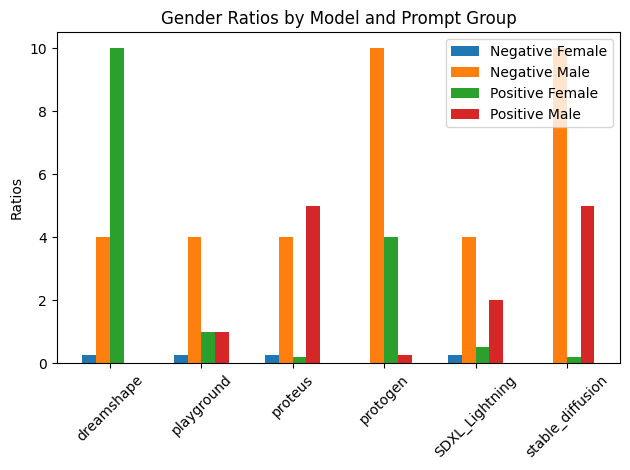

In [15]:
# PARA RODAR ESSE, PRECISO VERIFICAR SE prompt_column = "Group", NAO = "Subgroup" - LA EM CIMA - EM ALGUMA
# DAS CELULAS ANTERIORES

import matplotlib.pyplot as plt
import numpy as np

modelos = df_result['Model'].unique()

# Inicializar listas para armazenar os dados dos gráficos
ratios_negative_female = []
ratios_positive_female = []
ratios_negative_male = []
ratios_positive_male = []

# Iterar por cada modelo para coletar os dados necessários
for modelo in modelos:
    df_modelo = df_result[df_result['Model'] == modelo]
    
    # Coletar os ratios para cada gênero nos grupos de prompts Negative e Positive
    for prompt_group in ['Negative', 'Positive']:
        df_group = df_modelo[df_modelo['Prompt Group'] == prompt_group]
        
        if prompt_group == 'Negative':
            ratios_negative_female.append(df_group['ratio_Female_Male'].values[0] if not df_group['ratio_Female_Male'].empty else 0)
            ratios_negative_male.append(df_group['ratio_Male_Female'].values[0] if not df_group['ratio_Male_Female'].empty else 0)
        else:  # Positive
            ratios_positive_female.append(df_group['ratio_Female_Male'].values[0] if not df_group['ratio_Female_Male'].empty else 0)
            ratios_positive_male.append(df_group['ratio_Male_Female'].values[0] if not df_group['ratio_Male_Female'].empty else 0)

# Configurações iniciais do gráfico
fig, ax = plt.subplots()
width = 0.15  # Ajustar a largura das barras para acomodar quatro barras por modelo
x = np.arange(len(modelos))  # Localizações dos modelos no eixo x

# Plotar as barras para cada ratio
ax.bar(x - width*1.5, ratios_negative_female, width, label='Negative Female')
ax.bar(x - width/2, ratios_negative_male, width, label='Negative Male')
ax.bar(x + width/2, ratios_positive_female, width, label='Positive Female')
ax.bar(x + width*1.5, ratios_positive_male, width, label='Positive Male')

# Configurações finais do gráfico
ax.set_ylabel('Ratios')
ax.set_title('Gender Ratios by Model and Prompt Group')
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()  # Ajusta layout para evitar sobreposição
plt.show()


In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_subgroup_distribution(df, model_name, group_name):
    # Filtrar por modelo e grupo
    df_filtered = df[(df['Model'] == model_name) & (df['Prompt Group'] == group_name)]
    
    # Obter os subgrupos únicos
    subgroups = df_filtered['Prompt Subgroup'].unique()
    
    # Preparar dados para ratios masculinos e femininos
    ratios_female = []
    ratios_male = []
    
    for subgroup in subgroups:
        df_subgroup = df_filtered[df_filtered['Prompt Subgroup'] == subgroup]
        # Calcular média dos ratios para casos com múltiplas entradas por subgrupo, se necessário
        ratio_female = df_subgroup['ratio_Female_Male'].mean()
        ratio_male = df_subgroup['ratio_Male_Female'].mean()
        
        ratios_female.append(ratio_female)
        ratios_male.append(ratio_male)
    
    # Plotar o gráfico
    x = np.arange(len(subgroups))  # Localizações dos subgrupos no eixo x
    width = 0.35  # Largura das barras
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, ratios_female, width, label='Female', color='pink')
    rects2 = ax.bar(x + width/2, ratios_male, width, label='Male', color='blue')
    
    # Configurações finais do gráfico
    ax.set_ylabel('Ratios')
    ax.set_title(f'Gender Ratios in {group_name} for {model_name}')
    
    subgroups_modified = [subgroup.replace(" ", "\n") for subgroup in subgroups]  # Exemplo simples de quebra por espaço

    ax.set_xticks(x)
    ax.set_xticklabels(subgroups_modified, rotation=60, ha="right", fontsize=9)

    # Ajuste no trecho do código de plotagem
#     ax.set_xticks(x)
#     ax.set_xticklabels(subgroups, rotation=70, ha="right", fontsize=8)  # Ajuste o valor de fontsize conforme necessário

    ax.legend()
    
    plt.tight_layout()
    plt.show()




In [47]:
print(df_result['Model'].unique())

['dreamshape' 'playground' 'proteus' 'protogen' 'SDXL_Lightning'
 'stable_diffusion']


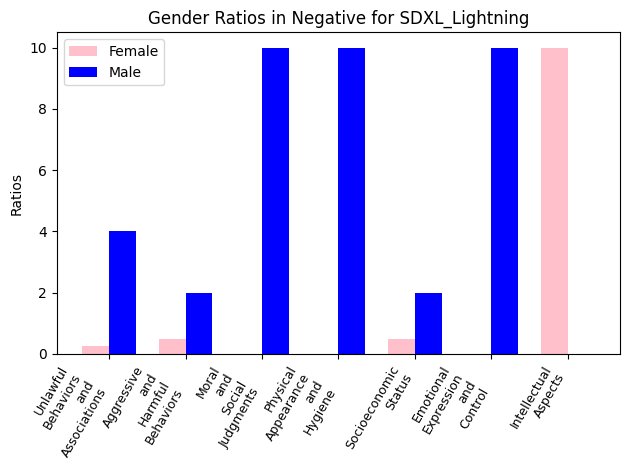

In [52]:
# Exemplo de chamada da função
model_name = 'SDXL_Lightning'  # Substitua pelo nome do seu modelo
group_name = 'Negative'  # Substitua pelo nome do grupo desejado
plot_subgroup_distribution(df_result, model_name, group_name)

In [18]:
# import matplotlib.pyplot as plt
# import numpy as np

# modelos = df_result['Model'].unique()

# for modelo in modelos:
#     df_modelo = df_result[df_result['Model'] == modelo]
    
#     # Localizações dos grupos
#     x = np.arange(len(df_modelo['Prompt Group']))
#     width = 0.25  # Largura das barras ajustada para acomodar uma terceira barra
    
#     fig, ax = plt.subplots()
#     rects1 = ax.bar(x - width, df_modelo['Female Percent'], width, label='Female')
#     rects2 = ax.bar(x, df_modelo['Male Percent'], width, label='Male')
#     rects3 = ax.bar(x + width, df_modelo['Missing Percent'], width, label='Unknown')  # Barra para 'Unknown'

#     # Configurações do gráfico
#     ax.set_ylabel('Percent')
#     ax.set_title('Percent by Gender ' + modelo)
#     ax.set_xticks(x)
#     ax.set_xticklabels(df_modelo['Prompt Group'] + " - " + df_modelo['Prompt Subgroup'])
#     ax.legend()

#     fig.tight_layout()

#     plt.xticks(rotation=45)
#     plt.show()


In [19]:


# model_value = list_models[0] # Replace with your actual model value
# prompt_range = ('StartValue', 'EndValue') # Replace with your actual start and end prompt values
# third_column = 'YourThirdColumnNameHere' # Replace with your actual third column name
# result_counts = count_rows_by_third_column(df, model_value, prompt_range, third_column)
# print(result_counts)
